<a href="https://colab.research.google.com/github/miruthunjaya/CODSOFT/blob/INTERNSHIP/TASK3_CODSOFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TASK-3 :  IRIS FLOWER CLASSIFICATION**

---



**BATCH :**  DEC Batch A23

**DOMAIN :** DATA SCIENCE


**Problem Statement:**

    Create the model that can classify the different species of the Iris flower.

**Problem solving:**
    
    1. Create the dataset.
    2. Build the model
    3. Train the model
    4. Make predictions.

**Iris Flower:**
    
    Iris is the family in the flower which contains the several species such as the iris.setosa,iris.versicolor,iris.virginica,etc.

**ABOUT DATASET**

The Iris Flower Dataset contains three different flower species (classes) of the Iris family, which are

* Iris setosa

* Iris versicolor

* Iris virginica

In the Iris dataset, each class contains 5 distinct features, namely Petal Width, Petal Length, Sepal Width, Sepal Length, and Species Type.

The Iris dataset is a basic function in data science which is why it is often referred to as the 'Hello World' of data science.

The main objective of this dataset is to classify a new flower having 4 unique features belonging to one of the three classes.

We will perform Exploratory Data Analysis (EDA) on the Iris dataset to find out meaningful patterns.

You can download the Iris dataset from Kaggle: https://www.kaggle.com/datasets/arshid/iris-flower-dataset and start using it. The dataset contains 150 data points.

#Importing Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

*Matplotlib and Seaborn are used for visualizations and warnings; We can ignore all the warnings we encounter.*

#Loading Dataset

In [ ]:
#Uploading the dataset
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [ ]:
#calling the dataset
import io
iris = pd.read_csv(io.BytesIO(uploaded['IRIS.csv']))


#Data Inspection

In [ ]:
#Let us view the dataframe
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


* No. of rows: 150
* No. of columns: 5

In [ ]:
# basic info about datatypes
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


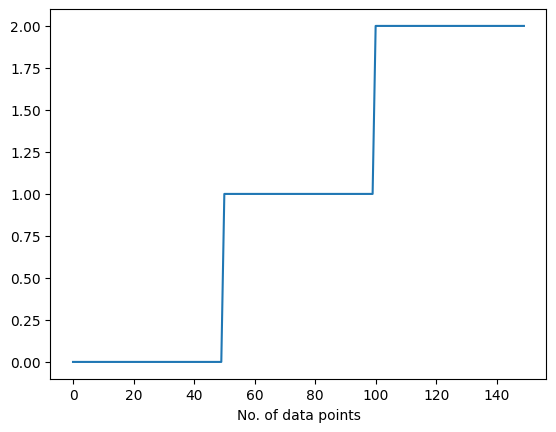

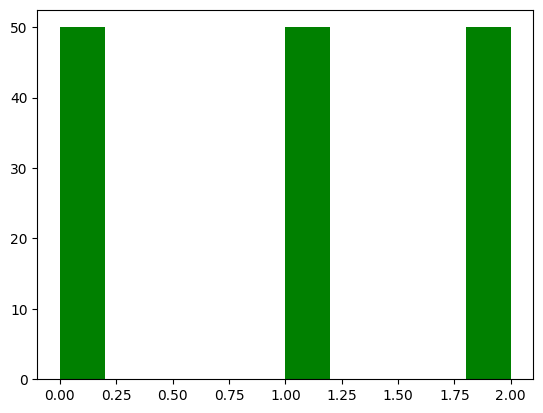

In [ ]:
# First plot
plt.plot(iris["species"])
plt.xlabel("No. of data points")
plt.show()

# Second plot
plt.hist(iris["species"],color="green")
plt.show()

In [ ]:
# to view the column names in the data frame
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# to display stats about data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# check for null values
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

*We can see that all values are 0. It means that there are no null values over the entire data frame.*

In [ ]:
## Univariate analysis
iris.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
iris.groupby('species').agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                mean median        mean median         mean median   
species                                                              
0              5.006    5.0       3.418    3.4        1.464   1.50   
1              5.936    5.9       2.770    2.8        4.260   4.35   
2              6.588    6.5       2.974    3.0        5.552   5.55   

        petal_width         
               mean median  
species                     
0             0.244    0.2  
1             1.326    1.3  
2             2.026    2.0

#Exploratory Data Analysis

In [ ]:
# to display no. of samples on each class
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: title={'center': 'Species Count'}, xlabel='species', ylabel='count'>

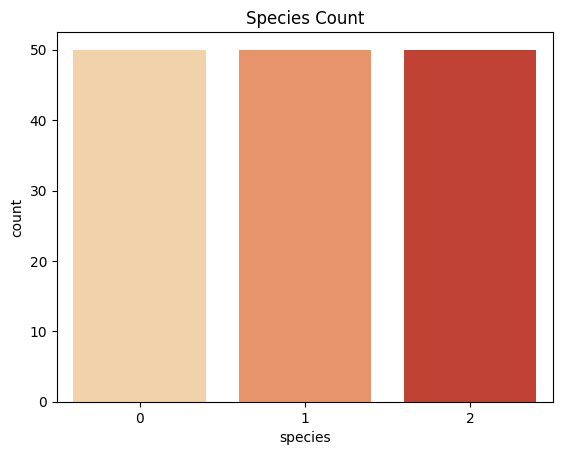

In [ ]:
plt.title('Species Count')

sns.countplot(x=iris['species'], palette='OrRd')

In [ ]:
x=iris.iloc[:,:4]
y=iris.iloc[:,4]

In [ ]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

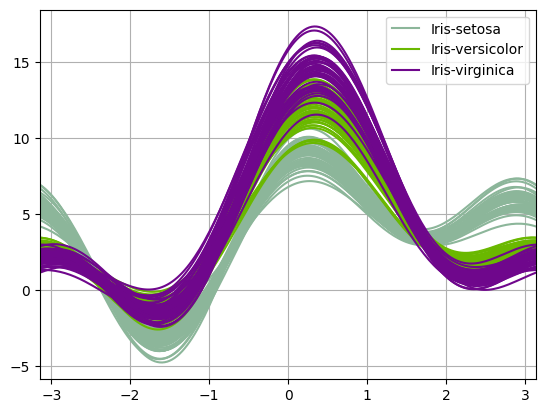

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(iris, "species")
plt.show()

DISTRIBUTION OF PARTICULAR SPECIES

Text(0.5, 1.0, 'sepal length distribution plot')

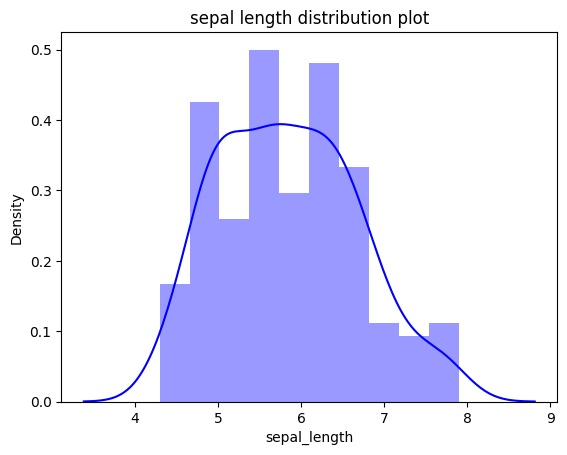

In [ ]:
sns.distplot(a=iris['sepal_length'], bins=10, color='b')
plt.title('sepal length distribution plot')

Text(0.5, 1.0, 'petal length distribution plot')

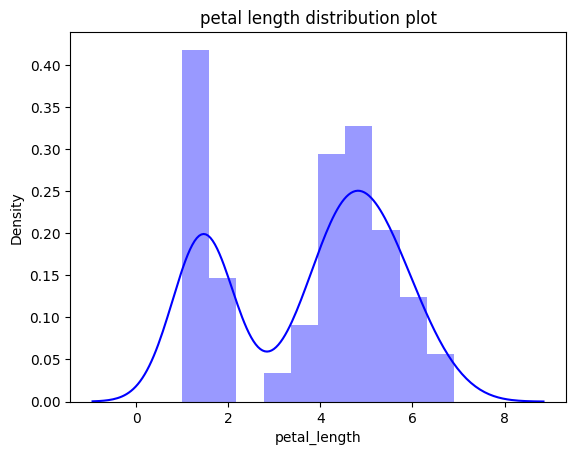

In [ ]:
sns.distplot(a=iris['petal_length'], bins=10, color='b')
plt.title('petal length distribution plot')

Text(0.5, 1.0, 'sepal width distribution plot')

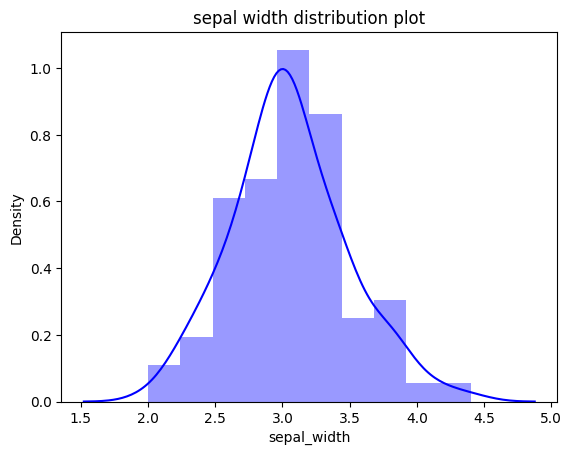

In [ ]:
sns.distplot(a=iris['sepal_width'], bins=10, color='b')
plt.title('sepal width distribution plot')

Text(0.5, 1.0, 'petal width distribution plot')

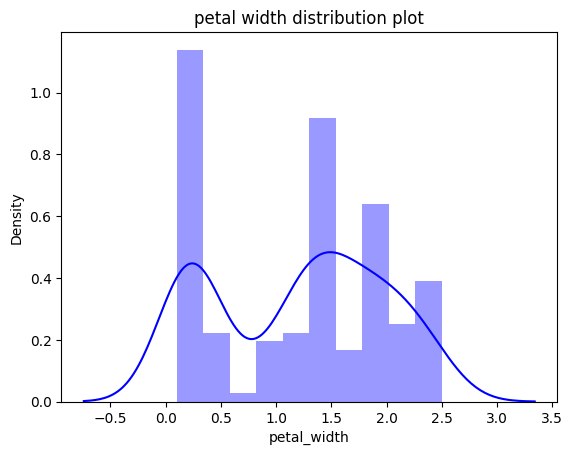

In [ ]:
sns.distplot(a=iris['petal_width'], bins=10, color='b')
plt.title('petal width distribution plot')

SCATTER PLOTS FOR INFERENCE

In [ ]:
# create list of colors and class labels
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

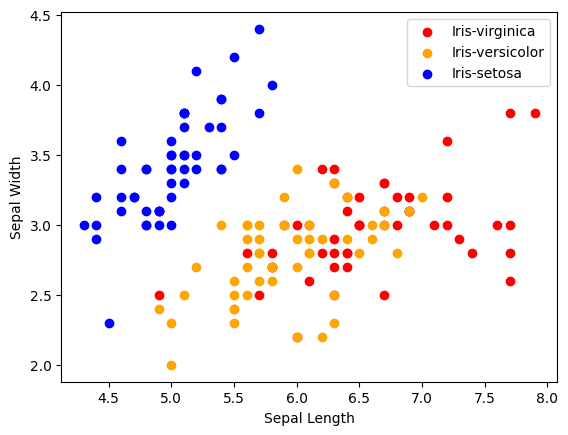

In [ ]:
for i in range(3):
    # filter data on each class
    x = iris[iris['species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

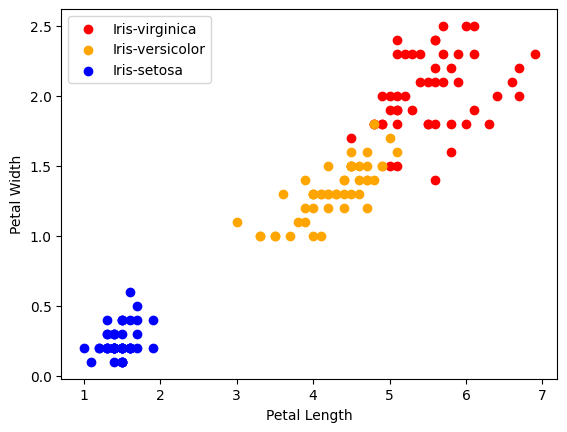

In [ ]:
for i in range(3):
    # filter data on each class
    x = iris[iris['species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

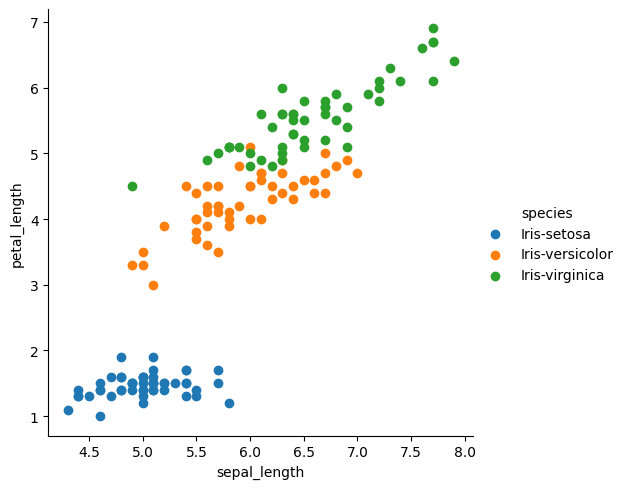

In [ ]:
#scatter plot
sns.FacetGrid(iris, hue='species', height=5).map(plt.scatter, 'sepal_length', 'petal_length').add_legend()

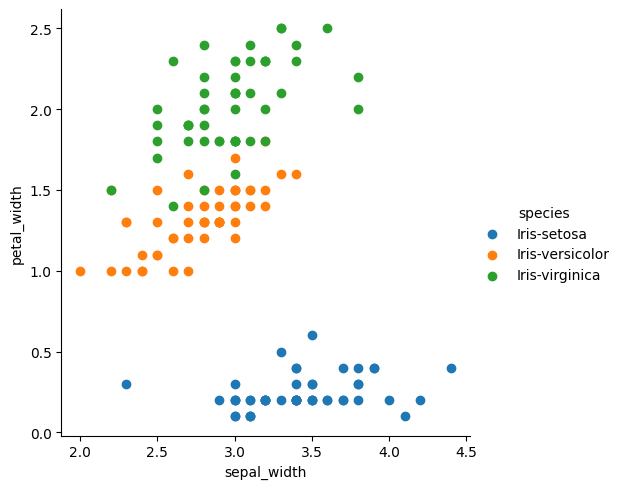

In [ ]:
#scatter plot
sns.FacetGrid(iris, hue='species', height=5).map(plt.scatter, 'sepal_width', 'petal_width').add_legend()

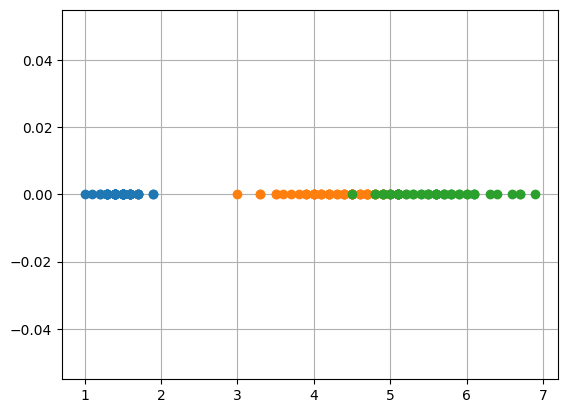

In [ ]:
# plotting different classes of target variable
iris_setosa = iris.loc[iris["species"] == "Iris-setosa"];
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"];
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"];
plt.plot(iris_setosa["petal_length"],
np.zeros_like(iris_virginica["petal_length"]), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_virginica["petal_length"]), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica["petal_length"]), 'o')
plt.grid()
plt.show()

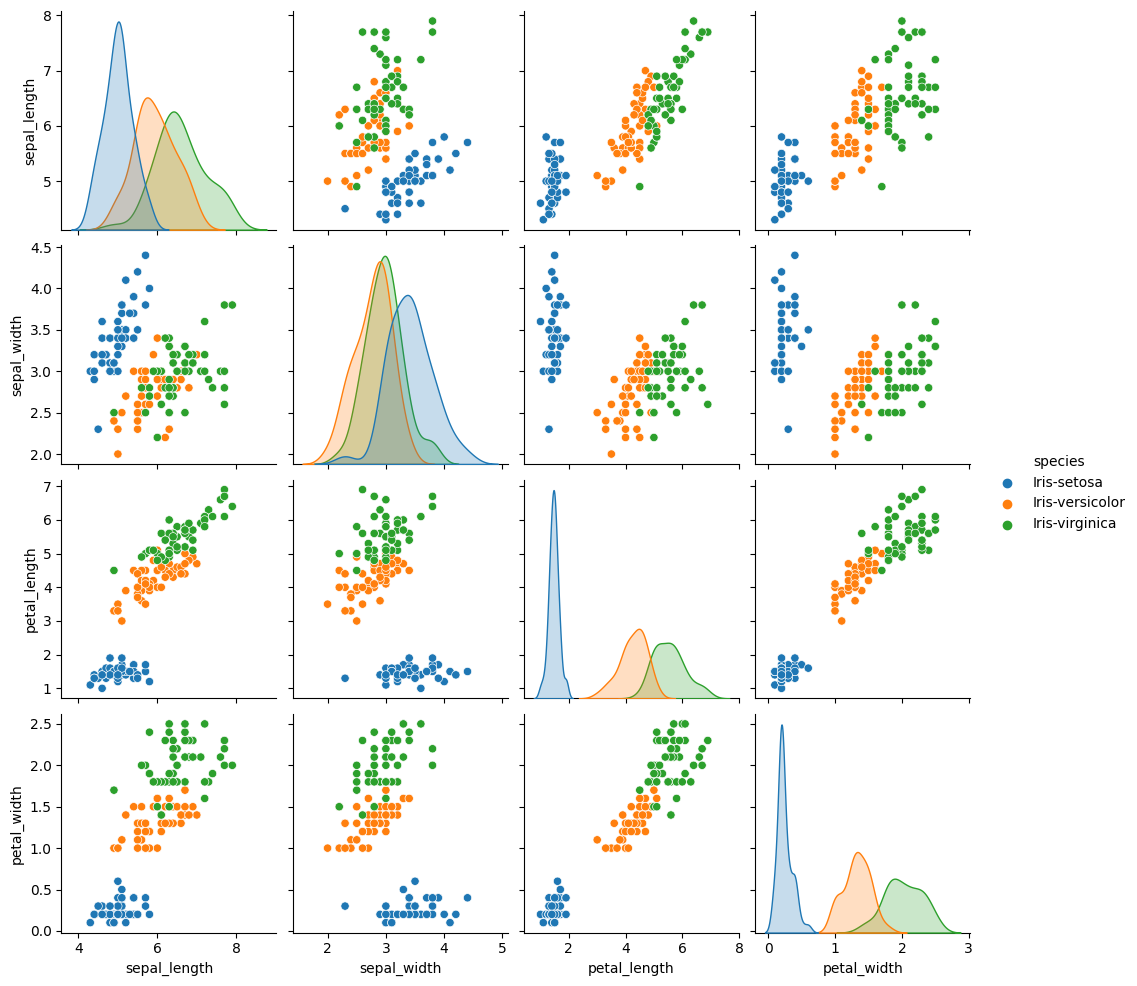

In [ ]:
#pair plot
sns.pairplot(iris[['sepal_length','sepal_width','petal_length','petal_width','species']], hue='species', diag_kind='kde')

<Axes: xlabel='species', ylabel='sepal_length'>

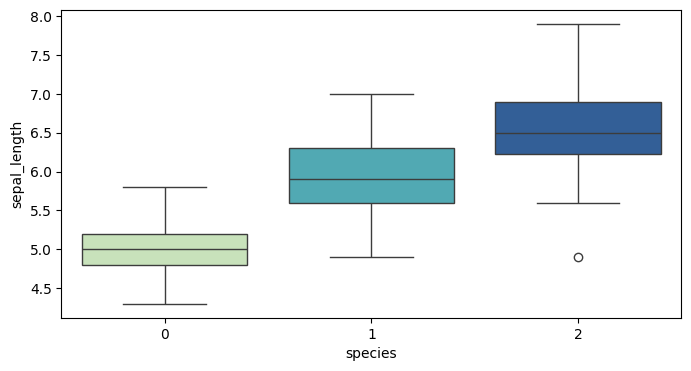

In [ ]:
# Box plot
plt.figure(figsize=(8,4))
sns.boxplot(x='species',y='sepal_length',data=iris ,palette='YlGnBu')

<Axes: xlabel='species', ylabel='petal_length'>

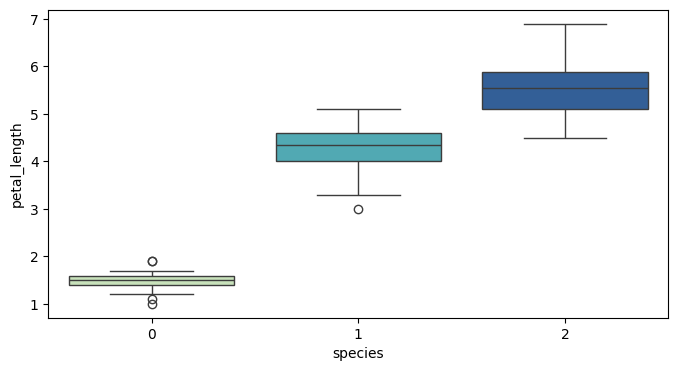

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='species',y='petal_length',data=iris ,palette='YlGnBu')

<Axes: xlabel='species', ylabel='sepal_width'>

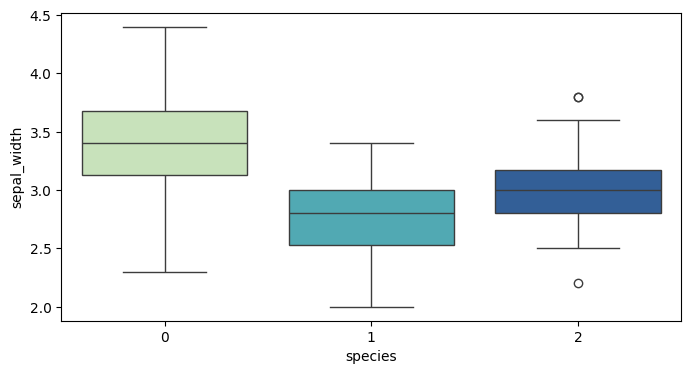

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='species',y='sepal_width',data=iris ,palette='YlGnBu')

<Axes: xlabel='species', ylabel='petal_width'>

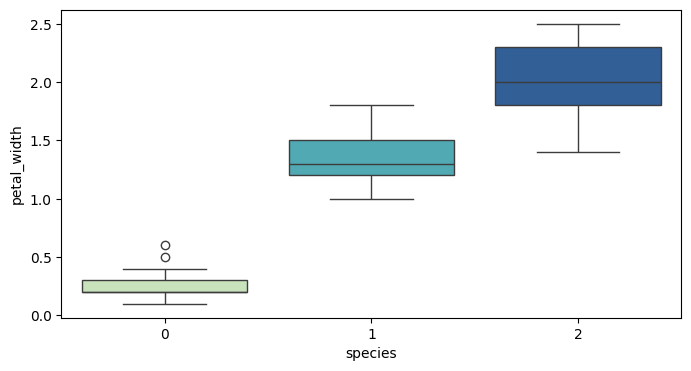

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='species',y='petal_width',data=iris ,palette='YlGnBu')

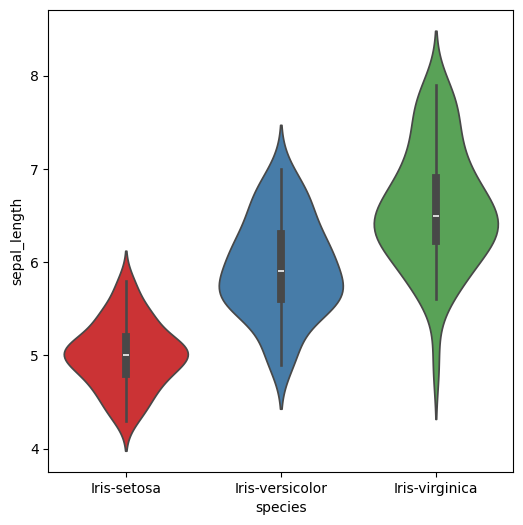

In [ ]:
#violin plot
plt.figure(figsize=(6,6))
sns.violinplot(data = iris, x='species', y='sepal_length', palette='Set1')
plt.show()

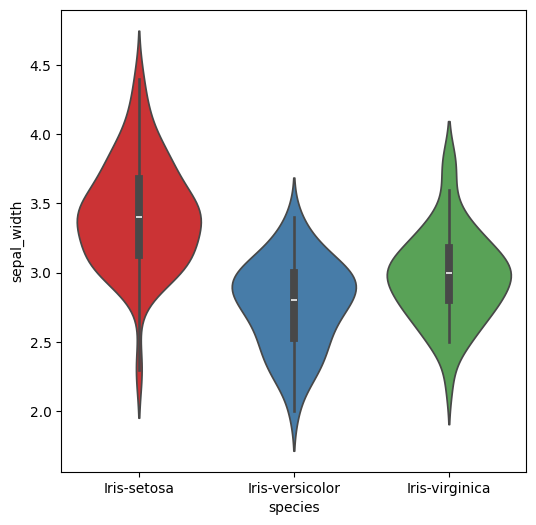

In [ ]:
plt.figure(figsize=(6,6))
sns.violinplot(data = iris, x='species', y='sepal_width', palette='Set1')
plt.show()

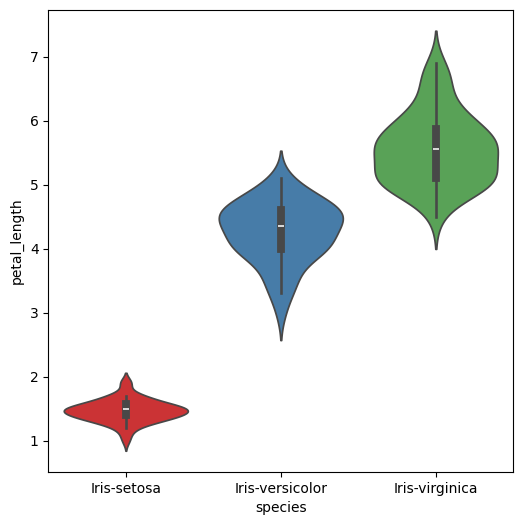

In [ ]:
plt.figure(figsize=(6,6))
sns.violinplot(data = iris, x='species', y='petal_length', palette='Set1')
plt.show()

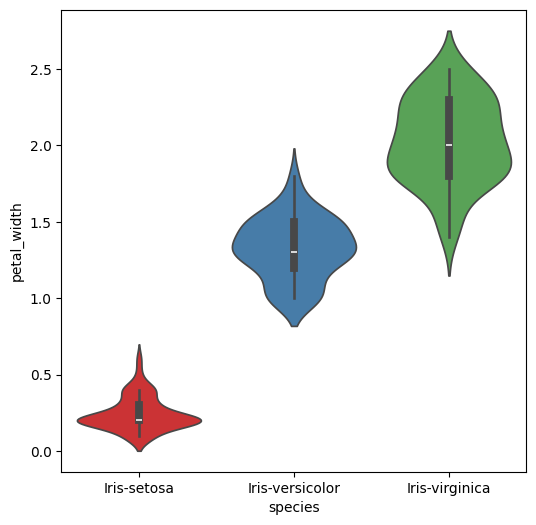

In [ ]:
plt.figure(figsize=(6,6))
sns.violinplot(data = iris, x='species', y='petal_width', palette='Set1')
plt.show()

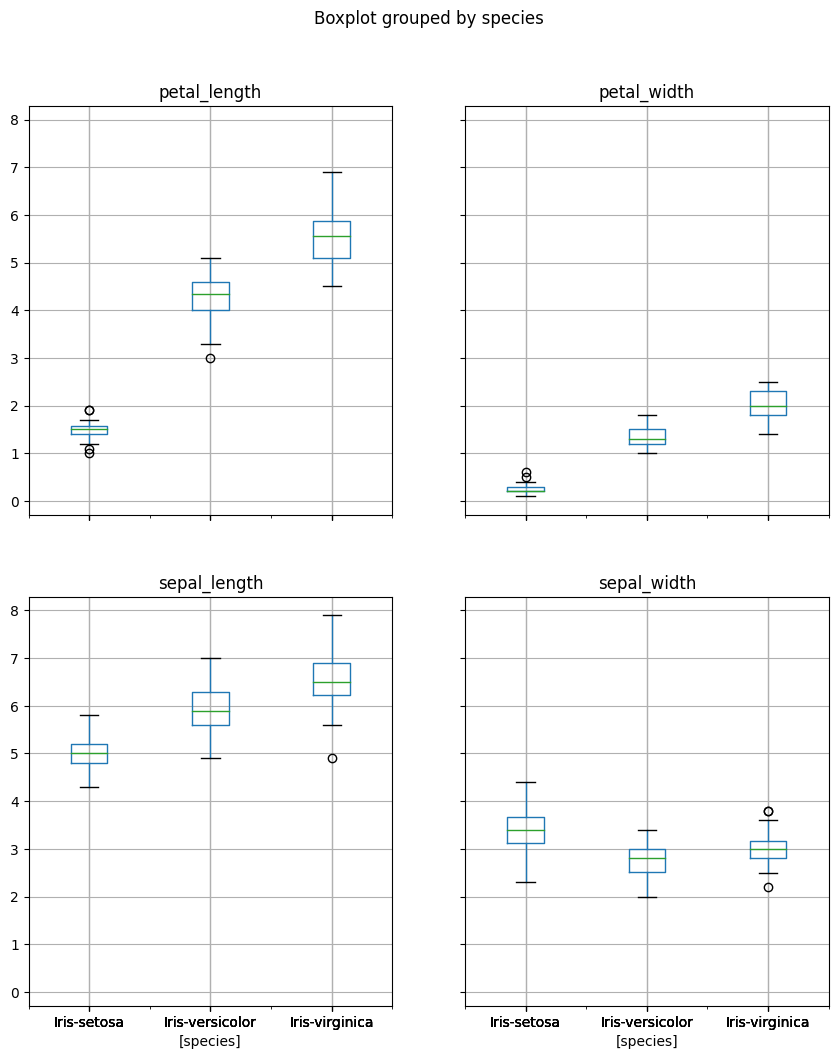

In [ ]:
iris.boxplot(by = 'species', figsize = (10,12))
plt.show()

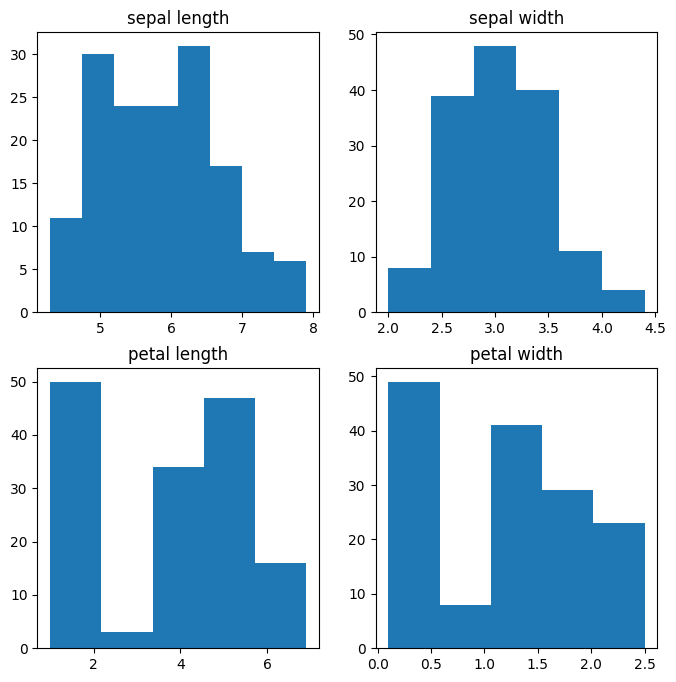

In [ ]:
figure, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0,0].set_title("sepal length")
ax[0,0].hist(iris['sepal_length'], bins=8)

ax[0,1].set_title("sepal width")
ax[0,1].hist(iris['sepal_width'], bins=6);

ax[1,0].set_title("petal length")
ax[1,0].hist(iris['petal_length'], bins=5);

ax[1,1].set_title("petal width")
ax[1,1].hist(iris['petal_width'], bins=5);

From the above plot we can see that –
*  *Sepal length highest freq lies between 5.5 cm to 6 cm which is 30-35 cm*
* *Petal length highest freq lies between 1 cm to 2 cm which is 50 cm*
*  *Sepal width highest freq lies between 3 cm to 3.5 cm which is 70 cm*
* *Petal width highest freq lies between 0 cm to 0.5 cm which is 40-45 cm*

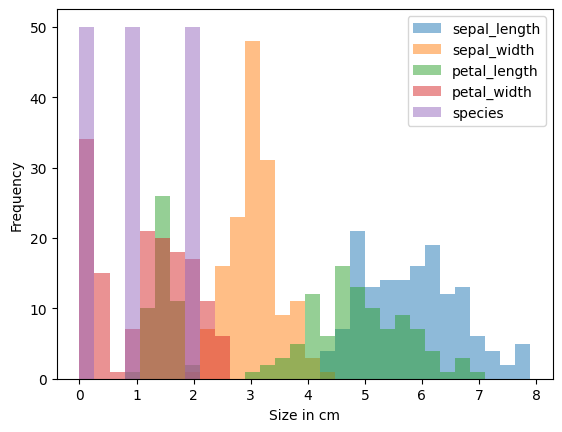

In [ ]:
# Frequency histogram plot of all features
axis = iris.plot.hist(bins=30, alpha=0.5)
axis.set_xlabel('Size in cm');

3D VISUALIZATION

In [ ]:
import plotly.express as px
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width', color='species')
fig.show()

PDF and CDF

    PDF - Probability Density Function
    CDF - Cumulative Distributive Function

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


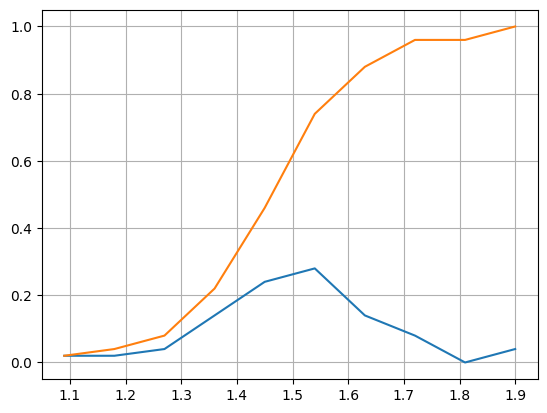

In [ ]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.grid()
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)


*This is only for the setosa class petal length.*

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


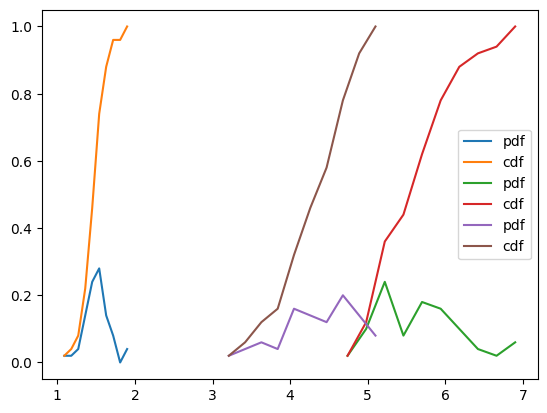

In [ ]:
# To plot PDF and CDF for all class
counts,bin_edges=np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf= counts/(sum(counts))
print(pdf)
print(bin_edges)

# to compute cdf
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')


counts,bin_edges=np.histogram(iris_virginica['petal_length'],bins=10,density=True)
pdf= counts/(sum(counts))
print(pdf)
print(bin_edges)

# to compute cdf
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')

counts,bin_edges=np.histogram(iris_versicolor['petal_length'],bins=10,density=True)
pdf= counts/(sum(counts))
print(pdf)
print(bin_edges)

# to compute cdf
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()
plt.show()

CORRELATION STUDY

In [ ]:
# correlation matrix
iris.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

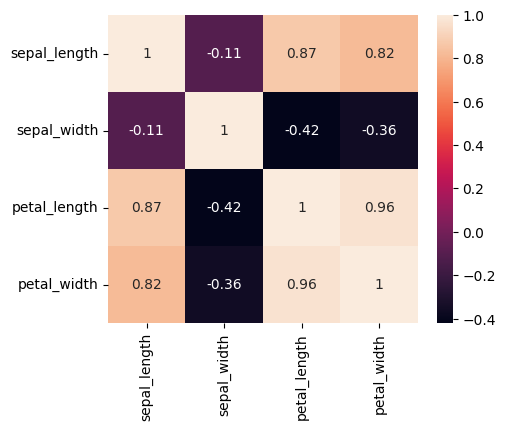

In [ ]:
#heat map
corr = iris.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax = ax)

*Observations:*
* Petal length and petal width have high positive correlation of 0.96

* If petal length value increases, petal width also increases

* Sepal length have high positive correlation with petal length and petal width

* Sepal width have negative correlation with petal length and petal width

LM PLOTS

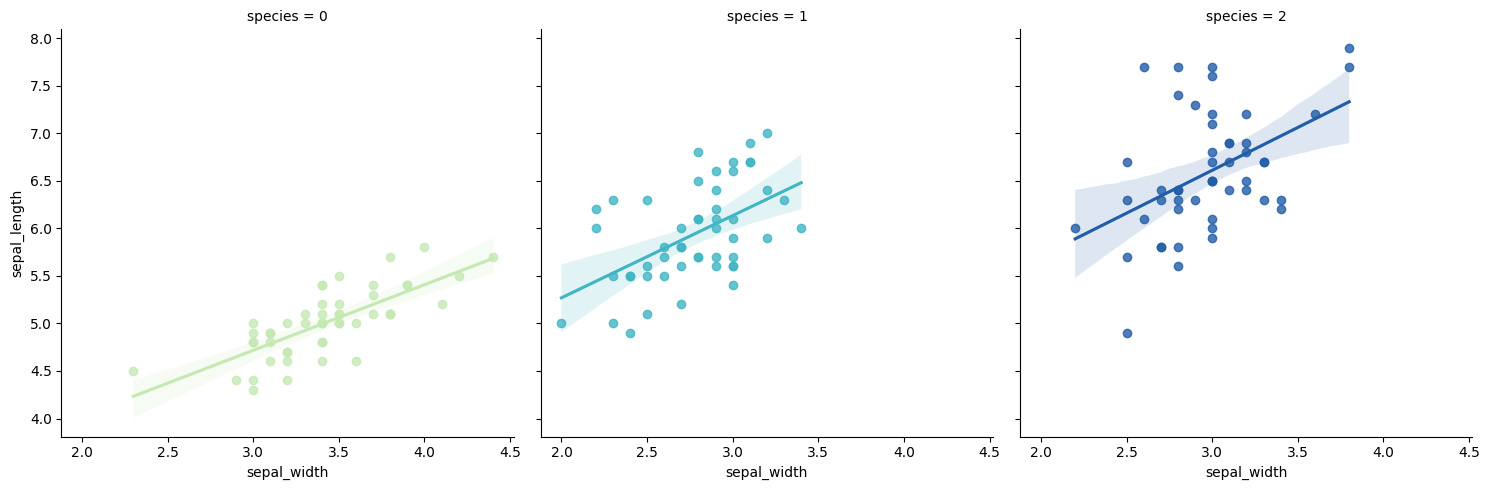

In [ ]:
sns.lmplot(x = 'sepal_width', y = 'sepal_length', data = iris, col = 'species', hue = 'species', palette = 'YlGnBu')

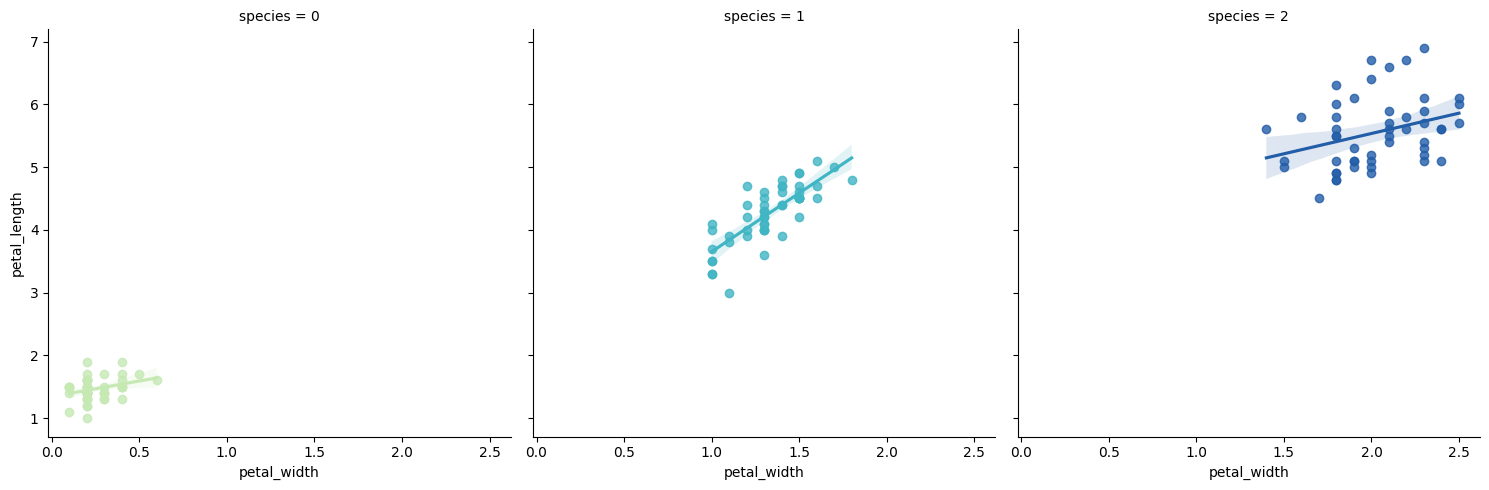

In [ ]:
sns.lmplot(x = 'petal_width', y = 'petal_length', data = iris, col = 'species', hue = 'species', palette = 'YlGnBu')

CLUSTER MAP

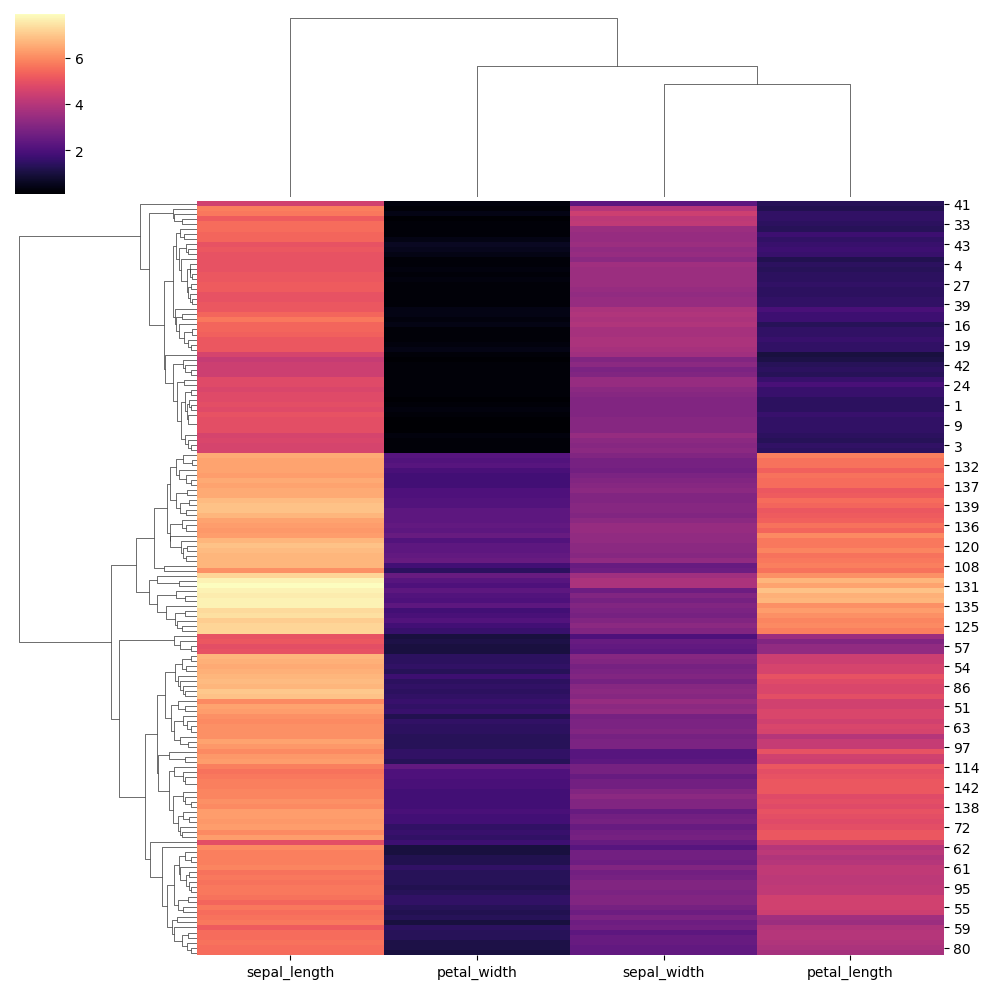

In [ ]:
x = iris.drop('species',axis=1)
g = sns.clustermap(x, cmap="magma")

JOINT PLOT
    
    Used to draw a plot of two variables with bivariate and univariate graphs.

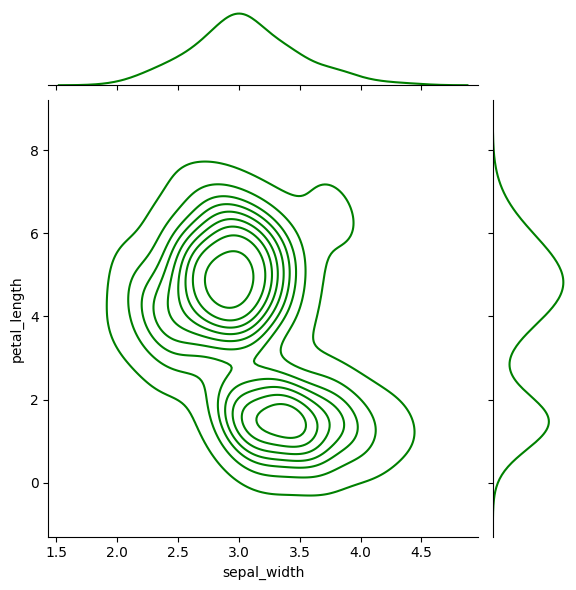

In [ ]:
sns.jointplot(x="sepal_width", y="petal_length", data=iris, kind="kde", color="g")

SEPARATING THE INPUT AND OUTPUT COLUMNS

In [ ]:
#separate features and target
data = iris.values
X = data[:, 0:4]
Y= data[:, 4]
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
print(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

#Model Training



> Label Encoder



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# transform the string labels to integer
iris['species'] = le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0




> Split the data into Train and Test dataset



In [ ]:
## train - 70%
## test - 30%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, shuffle = True, random_state = 69)


In [ ]:
x_train.shape

(105, 4)

In [ ]:
x_test.shape

(45, 4)

In [ ]:
y_train.shape

(105, 1)

In [ ]:
y_test.shape

(45,)

#Create the Model(Classification)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


MODEL 1: SUPPORT VECTOR MACHINE ALGORITHM

In [ ]:
from sklearn.svm import SVC

model_svc= SVC()
model_svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred= model_svc.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [ ]:
# to find the accuracy of the model and view the confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 16]])

In [ ]:
#accuracy
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


Accuracy of the model is 97.78


MODEL 2: LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lgr = LogisticRegression()
model_lgr.fit(x_train,y_train)


LogisticRegression()

In [ ]:
y_pred = model_lgr.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

*It contains species names in the form of an array.*

In [ ]:
# to view the confusion matrix of the model
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 16]])

In [ ]:
#accuracy
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.78


*This model classified flowers into their species.
And we got an accuracy of 97.78%, which shows that the model we built is very accurate.*

MODEL 3: DECISION TREE CLASSIFIER


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model_DTC.predict(x_test)
confusion_matrix(y_test, y_pred) #confusion matrix of the model

array([[16,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 16]])

In [ ]:
#accuracy
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.78


MODEL 4: K-NEAREST NEIGHBOURS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_pred = model_knn.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [ ]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  37.77777777777778


#Final Thoughts

---



* We have got around 100% accuracy for KNN with our test data split

* You can also try out various machine learning models similar to above

* More EDA can be done with boxplots, violinplot, barplot, etc.,


\


In this project, we have learnt on how to train machine learning classification model for iris flower dataset. We also learned about data analysis, visualizations, data transformation, model creation, etc.,